In [1]:
%config Completer.use_jedi = False

In [30]:
import pandas as pd
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector as SFS
import numpy as np

In [25]:
data = pd.read_csv('df_for_RF.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [9]:
X = data.iloc[:,2:]
y = data.iloc[:,1]

In [10]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(X)
print(data_constant.shape)

(117, 185)


## step 1. Removing Constant Features

In [11]:
#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in X.columns
                    if column not in X.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

0


## step 2. Removing quasi-Constant Features

In [12]:
#Extracting almost constant columns using get support function of our filter
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(X)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in X.columns
                    if column not in X.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(117, 174)
11
gmd_17Networks_RH_DefaultB_PFCd_2
gmd_17Networks_RH_SomMotA_11
gmd_17Networks_RH_SomMotA_10
gmd_17Networks_RH_SomMotA_7
gmd_17Networks_RH_SomMotA_4
gmd_17Networks_RH_VisCent_ExStr_9
gmd_17Networks_RH_VisCent_ExStr_8
gmd_17Networks_LH_DefaultB_PFCv_4
gmd_17Networks_LH_LimbicB_OFC_1
gmd_17Networks_LH_DorsAttnB_PostC_6
gmd_17Networks_LH_SomMotA_11


In [17]:
# removing 11 Quasi constant columns
data_qcons = data.drop(qcons_columns,axis=1)
data_qcons.shape

(117, 176)

## step 3. checking for duplicate features

In [18]:
# check for duplicate features
data_qcons_t = data_qcons.T
data_qcons_t.shape

(176, 117)

In [19]:
print(data_qcons_t.duplicated().sum())

0


In [20]:
data.head()

,Subject_ID,diagadhd,CHILDgender,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,sub-0015,0,1,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,sub-0085,0,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,sub-0134,0,1,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,sub-0152,0,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,sub-0260,1,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


In [26]:
data.drop('Subject_ID', axis = 1, inplace = True)
data.drop('CHILDgender', axis = 1, inplace = True)
data.head()

,diagadhd,zfALFF_17Networks_9,zfALFF_17Networks_2,zfALFF_lPFtha_L,zfALFF_cTtha_L,zfALFF_Otha_L,zfALFF_rTtha_R,zfALFF_rTtha_L,zfALFF_Stha_R,zfALFF_Stha_L,...,zDCwei_17Networks_RH_SomMotA_6,zDCwei_17Networks_LH_DefaultC_PHC_3,zDCwei_17Networks_LH_DefaultB_Temp_5,zDCwei_17Networks_LH_ContB_Temp_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_2,zDCwei_17Networks_LH_SalVentAttnA_FrMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParMed_1,zDCwei_17Networks_LH_SalVentAttnA_ParOper_1,zDCwei_17Networks_LH_DorsAttnB_PostC_1,zDCwei_17Networks_LH_DorsAttnA_TempOcc_2
0,0,-0.787030,-0.445804,-0.929277,-0.743303,-0.701746,-0.843242,-0.764751,-0.830111,-0.858958,...,0.570004,-0.130038,-0.047269,0.388094,0.158019,0.257226,0.094419,0.157887,0.042376,-0.074321
1,0,-0.601078,-0.304966,-0.397031,-0.381863,-0.449357,-0.341996,-0.347692,-0.348079,-0.334773,...,0.280915,-0.321277,-0.009029,-0.196261,0.080881,0.170051,0.153607,0.192767,-0.052853,0.049870
2,0,-0.799635,-0.231216,-0.840667,-0.901478,-0.487365,-0.710494,-0.512793,-0.807105,-0.824212,...,0.631763,0.249275,0.492542,0.465131,0.149572,0.168241,0.310641,0.219820,0.148504,0.236822
3,0,-0.485006,-0.223685,-0.294288,-0.634390,-0.597999,-0.640255,-0.425914,-0.672409,-0.644164,...,-0.034122,0.082488,0.263105,0.375573,-0.179384,0.009714,0.205987,0.018744,0.069715,0.291880
4,1,-0.853856,-0.356149,-0.863769,-0.617213,-0.475704,-0.797962,-0.641054,-0.861669,-0.868551,...,-0.181578,0.304288,0.449225,0.739805,0.125963,0.116520,0.293805,0.122458,-0.000745,0.174841


## step 4. Finding correlation with target variable of independent predictors:

In [31]:
imp = data.drop("diagadhd", axis=1).apply(lambda x: x.corr(data.diagadhd))
print(imp)
indices = np.argsort(imp)
print(indices)
print(imp[indices])     #Sorted in ascending order

zfALFF_17Networks_9                            0.099309
zfALFF_17Networks_2                           -0.042609
zfALFF_lPFtha_L                                0.162320
zfALFF_cTtha_L                                 0.210735
zfALFF_Otha_L                                  0.159957
                                                 ...   
zDCwei_17Networks_LH_SalVentAttnA_FrMed_1     -0.246137
zDCwei_17Networks_LH_SalVentAttnA_ParMed_1    -0.024800
zDCwei_17Networks_LH_SalVentAttnA_ParOper_1   -0.132201
zDCwei_17Networks_LH_DorsAttnB_PostC_1        -0.050225
zDCwei_17Networks_LH_DorsAttnA_TempOcc_2      -0.051119
Length: 184, dtype: float64
zfALFF_17Networks_9                            179
zfALFF_17Networks_2                             28
zfALFF_lPFtha_L                                172
zfALFF_cTtha_L                                  74
zfALFF_Otha_L                                  146
                                              ... 
zDCwei_17Networks_LH_SalVentAttnA_FrMed_1        5

## plotting for visualization

## fALFF visualization

In [75]:
imp

zfALFF_17Networks_9                            0.099309
zfALFF_17Networks_2                           -0.042609
zfALFF_lPFtha_L                                0.162320
zfALFF_cTtha_L                                 0.210735
zfALFF_Otha_L                                  0.159957
                                                 ...   
zDCwei_17Networks_LH_SalVentAttnA_FrMed_1     -0.246137
zDCwei_17Networks_LH_SalVentAttnA_ParMed_1    -0.024800
zDCwei_17Networks_LH_SalVentAttnA_ParOper_1   -0.132201
zDCwei_17Networks_LH_DorsAttnB_PostC_1        -0.050225
zDCwei_17Networks_LH_DorsAttnA_TempOcc_2      -0.051119
Length: 184, dtype: float64

IndexError: list index out of range

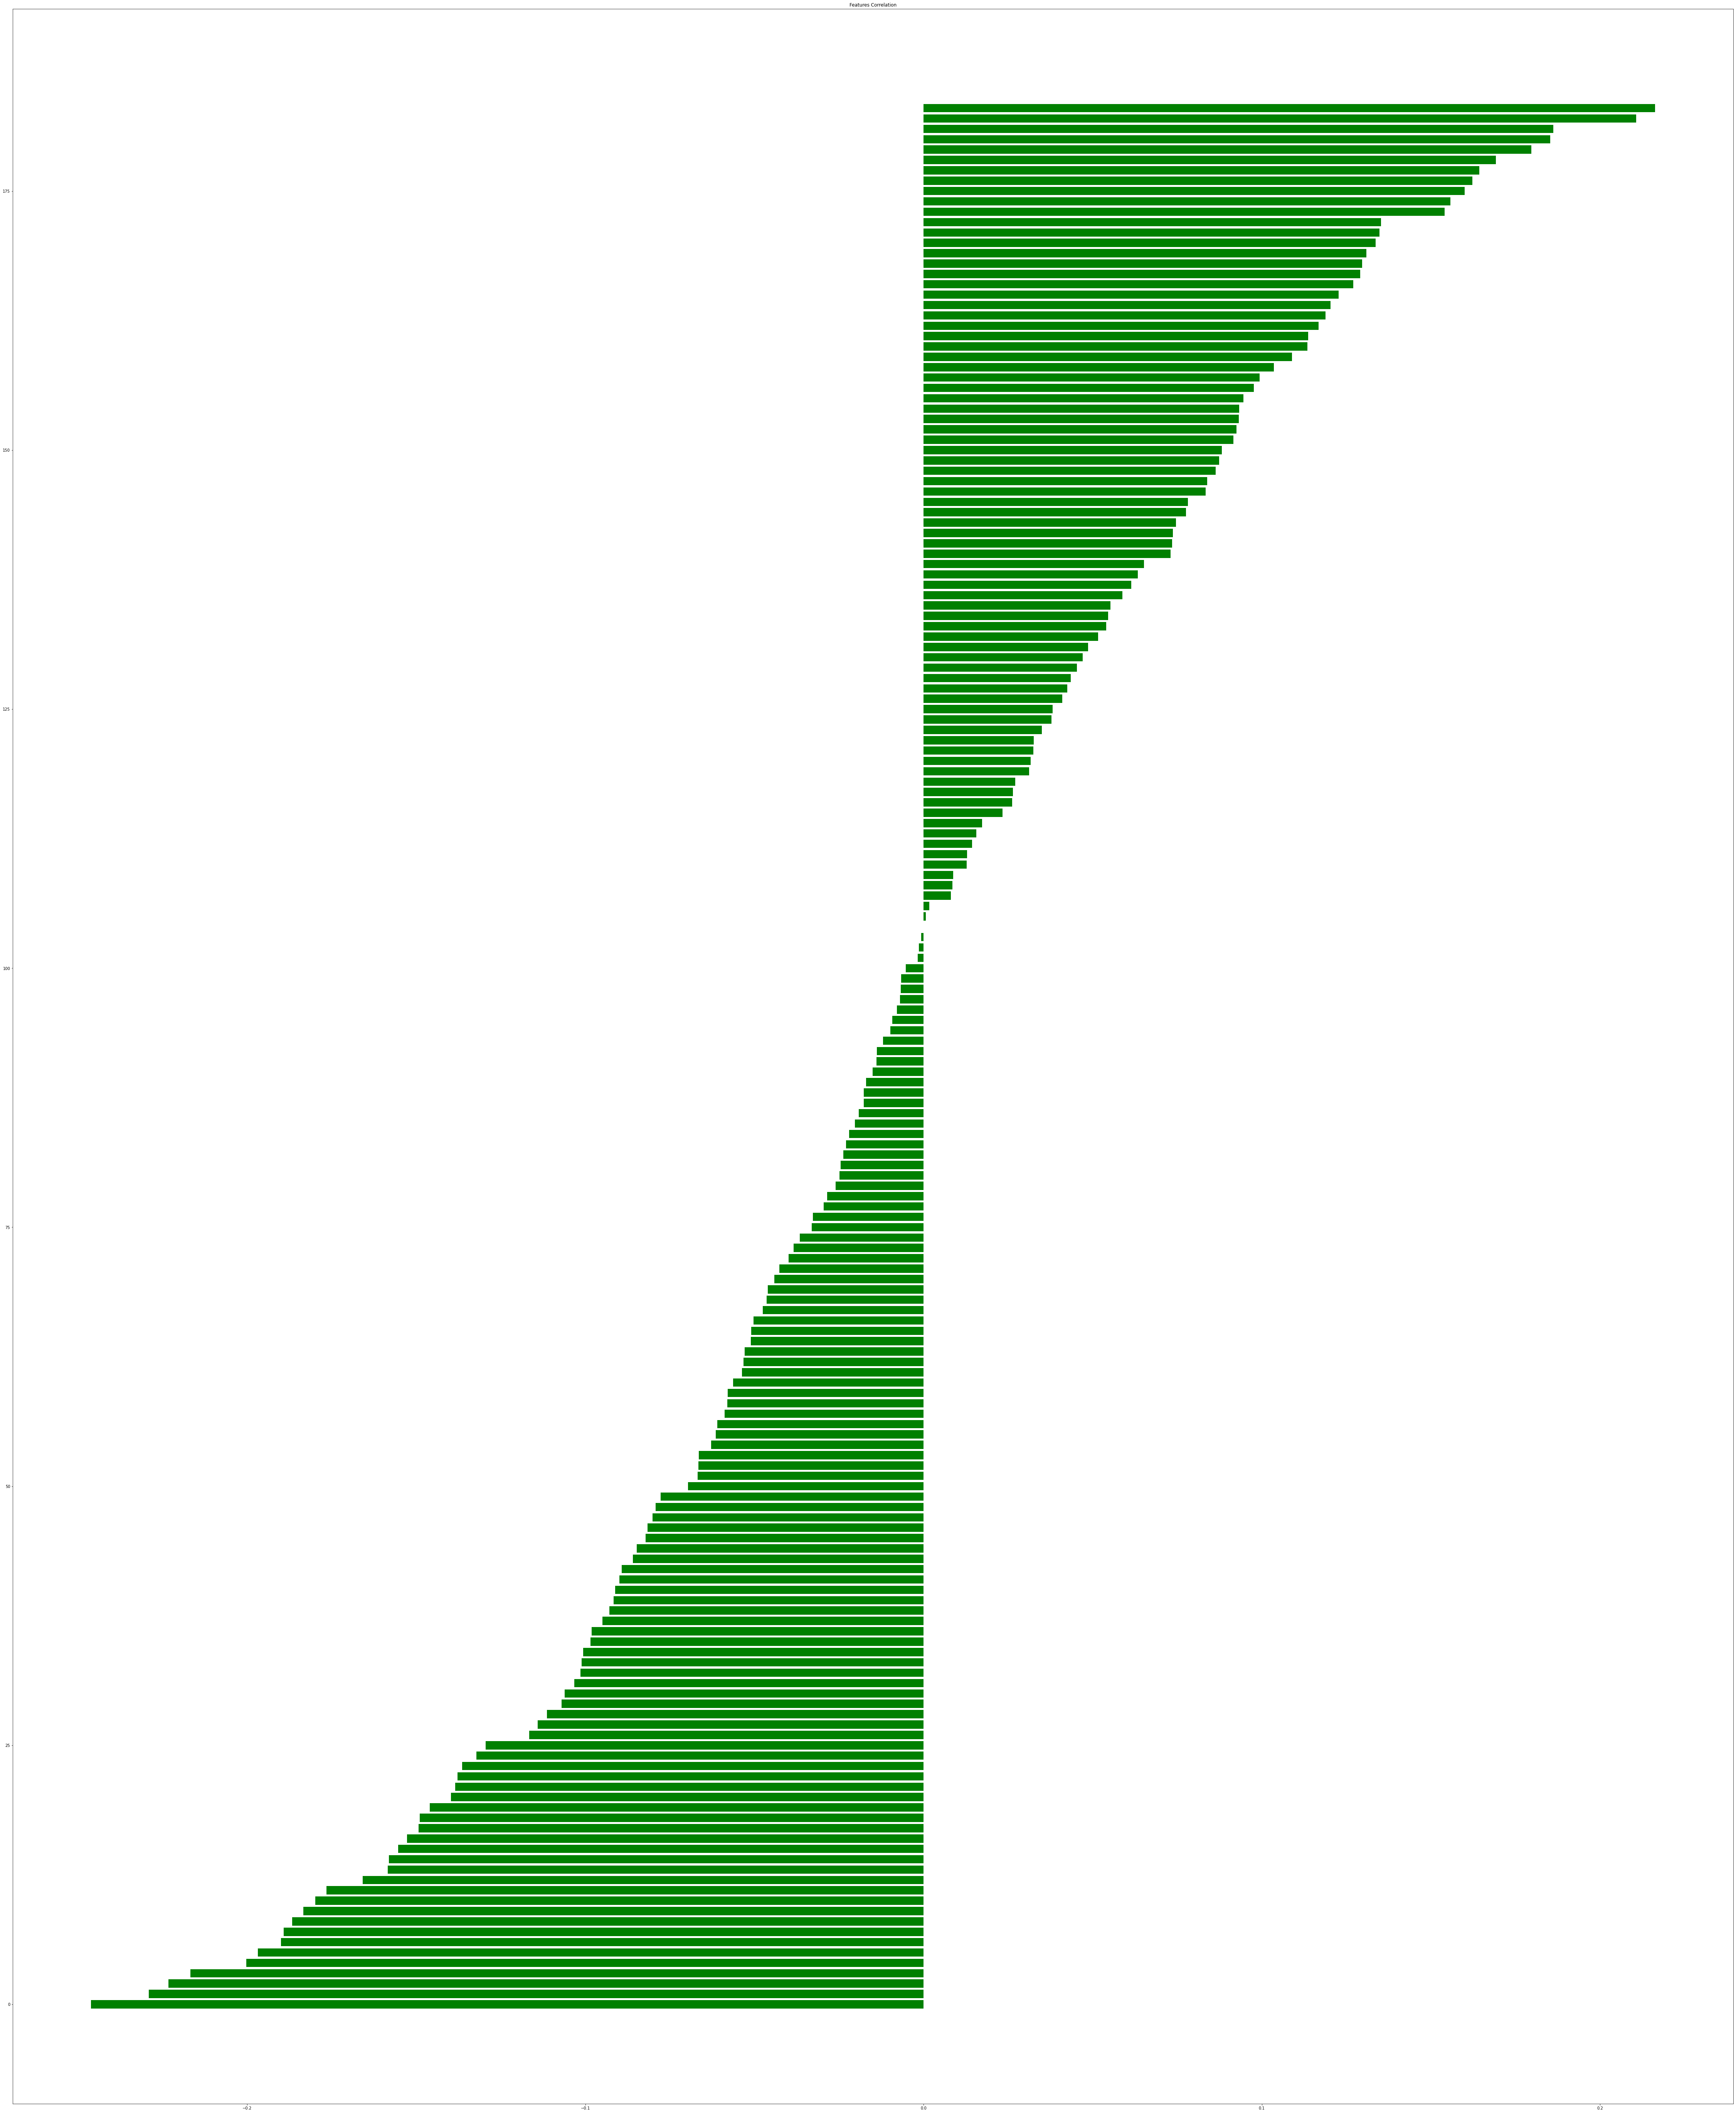

In [70]:
import matplotlib.pyplot as plt
names = []
#names=['cylinders','displacement','horsepower','weight','acceleration','model year', 'name']
for i in data.columns.values:
    if i.find('zfALFF') == 0:
        names.append(i)
df=data[names]
    
plt.title('Features Correlation')

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices], fontsize=20)
plt.xlabel('Relative Importance')
plt.rcParams['figure.figsize'] = [80, 100]
plt.savefig('test.jpg')
plt.show()

In [36]:
names = data.drop("diagadhd", axis=1).columns.array

In [37]:
names

<PandasArray>
[                        'zfALFF_17Networks_9',
                         'zfALFF_17Networks_2',
                             'zfALFF_lPFtha_L',
                              'zfALFF_cTtha_L',
                               'zfALFF_Otha_L',
                              'zfALFF_rTtha_R',
                              'zfALFF_rTtha_L',
                               'zfALFF_Stha_R',
                               'zfALFF_Stha_L',
                             'zfALFF_mPMtha_L',
 ...
              'zDCwei_17Networks_RH_SomMotA_6',
         'zDCwei_17Networks_LH_DefaultC_PHC_3',
        'zDCwei_17Networks_LH_DefaultB_Temp_5',
           'zDCwei_17Networks_LH_ContB_Temp_2',
   'zDCwei_17Networks_LH_SalVentAttnA_FrMed_2',
   'zDCwei_17Networks_LH_SalVentAttnA_FrMed_1',
  'zDCwei_17Networks_LH_SalVentAttnA_ParMed_1',
 'zDCwei_17Networks_LH_SalVentAttnA_ParOper_1',
      'zDCwei_17Networks_LH_DorsAttnB_PostC_1',
    'zDCwei_17Networks_LH_DorsAttnA_TempOcc_2']
Length: 184, dtype: o